<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">ELEE100312024-5SV1SEM2 </h1>  
    <h1 align="center" style="color:darkgoldenrod;"> Data Analysis and Machine Learning 4</h1>  
     
</div>


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left; color: black;">

<h3 align="center">💡 Coursework 2 Description :</h3>

## Task
To develop a model that can distinguish between real and fake academic papers based on textual features and metadata. The task involves both:
- **Binary Classification:** Predicting whether a paper is real or fake.
- **Regression:** Predicting the probability score of being fake.

## Dataset
- **Training Dataset (train.csv):** Contains features (`title`, `abstract`, `TLDR`, `model`) along with the target variables:
  - `generated` for classification.
  - `pred` for regression.

## Evaluation

### Binary and Multi Classification
 Binary Classification: To find if the research paper is  LLM generated or not. 
 Multi Classfication: To find which model generated a particular research paper.
The performance of the classification is evaluated by: 
- **Accuracy:** Proportion of correctly classified instances.
- **Precision:** Proportion of predicted positives that are actually positive.
- **Recall:** Proportion of actual positives correctly identified.
- **F1-Score:** Harmonic mean of precision and recall.
- **ROC-AUC:** Measures the ability of the model to distinguish between classes across different thresholds.

### Regression
Regression is performed to find the Probabilities. 
The performance of the regression model is evaluated using the following metrics:
- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.
- **Root Mean Squared Error (RMSE):** Square root of MSE, providing error in the same units as the target variable.
- **R² Score:** Indicates the proportion of variance in the target variable explained by the model.


## Key Objectives
1. **Data Analysis:** Perform exploratory data analysis (EDA) to understand the dataset's structure, distributions, and relationships between features.
2. **Feature Engineering:** Extract meaningful features from textual data (e.g., length, sentiment, embeddings) and preprocess the data for modeling.
3. **Model Development:** Train and evaluate multiple models for both classification and regression tasks.
4. **Model Selection:** Select the best-performing model for each task based on evaluation metrics and discuss its usefulness.

</div>

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Exploratory Data Analysis</h1>  
     
</div>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# Sklearn imports
from sklearn.datasets import make_classification
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer

# Better plots
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Loading  Dataset ♒</h1>  
     
</div>

In [49]:
# Load the dataset
df = pd.read_csv('cw2_dataset.csv')
df


,title,abstract,TLDR,generated,model,pred
0,Suppression helps: Lateral Inhibition-inspired...,Convolutional neural networks (CNNs) have beco...,Improving feature learning with lateral inhibi...,False,human,0.021709
1,Factorized Fourier Neural Operators,We propose the Factorized Fourier Neural Opera...,An efficient and scalable neural PDE solver us...,False,human,0.057647
2,DFPC: Data flow driven pruning of coupled chan...,"Modern, multi-branched neural network architec...",We propose a novel data-free algorithm to acce...,False,human,0.025089
3,TVSPrune - Pruning Non-discriminative filters ...,"Achieving structured, data-free sparsity of de...",We use the total variation distance between th...,False,human,0.039567
4,Finding Actual Descent Directions for Adversar...,Adversarial Training using a strong first-orde...,There is a subtle bug in the theory behind PGD...,False,human,0.297842
...,...,...,...,...,...,...
3480,Neural Program Synthesis from Natural Language...,Synthesizing programs from natural language de...,ExecFeedback improves code generation by execu...,True,claude3.7,0.030935
3481,Generative Music Composition with Interactive ...,Music generation models have advanced signific...,MelodyMaster generates music with user-defined...,True,claude3.7,0.227780
3482,Transformer-XF: Cross-Modal Feature Fusion wit...,Multimodal learning often suffers from naive f...,Transformer-XF dynamically routes multimodal t...,True,claude3.7,0.032825
3483,GraspNet: Few-Shot Learning for Robotic Manipu...,Robotic grasping remains challenging in novel ...,GraspNet learns generalizable grasp type embed...,True,claude3.7,0.070624


In [50]:
# Check for missing values
df.isnull().sum()

title        0
abstract     0
TLDR         0
generated    0
model        0
pred         0
dtype: int64

In [51]:
# Convert 'generated' column to categorical (True/False)
df['generated'] = df['generated'].astype('bool')

# Check the data types again
df.dtypes

title         object
abstract      object
TLDR          object
generated       bool
model         object
pred         float64
dtype: object

In [52]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      3485 non-null   object 
 1   abstract   3485 non-null   object 
 2   TLDR       3485 non-null   object 
 3   generated  3485 non-null   bool   
 4   model      3485 non-null   object 
 5   pred       3485 non-null   float64
dtypes: bool(1), float64(1), object(4)
memory usage: 139.7+ KB
None


In [53]:
# Summary statistics
print(df.describe())

              pred
count  3485.000000
mean      0.098303
std       0.209433
min       0.017443
25%       0.021508
50%       0.025952
75%       0.043640
max       0.976944


In [54]:
# Distribution of `generated`
print(df['generated'].value_counts())

generated
False    2609
True      876
Name: count, dtype: int64


In [55]:
# Distribution of `model`
print(df['model'].value_counts())

model
human           2609
deepseek_R1      200
gpt_o1           198
gemini2.0        178
llama3.3_70B     100
grok3            100
claude3.7        100
Name: count, dtype: int64


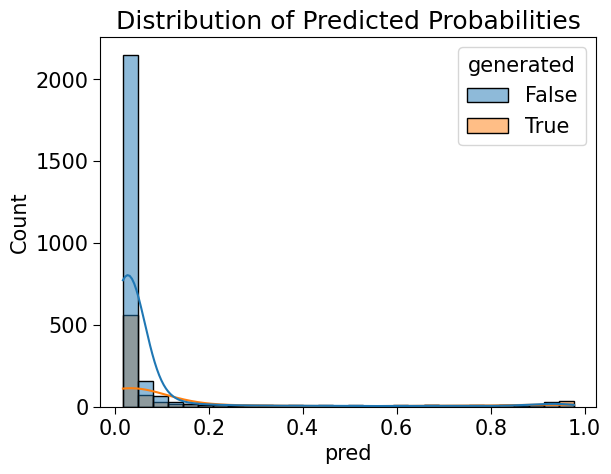

Text(0, 0.5, 'Count')

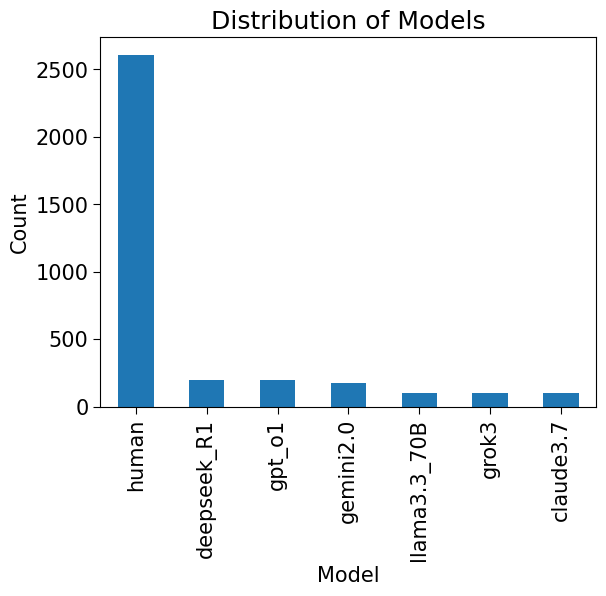

In [56]:
# Histogram of `pred` scores
sns.histplot(data=df, x='pred', hue='generated', bins=30, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.show()

# Bar plot of `model`
df['model'].value_counts().plot(kind='bar')
plt.title("Distribution of Models")
plt.xlabel("Model")
plt.ylabel("Count")

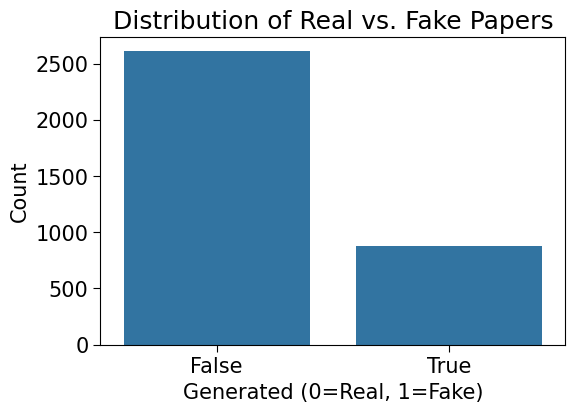

In [57]:
# Distribution of `generated`
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='generated')
plt.title("Distribution of Real vs. Fake Papers")
plt.xlabel("Generated (0=Real, 1=Fake)")
plt.ylabel("Count")
plt.show()

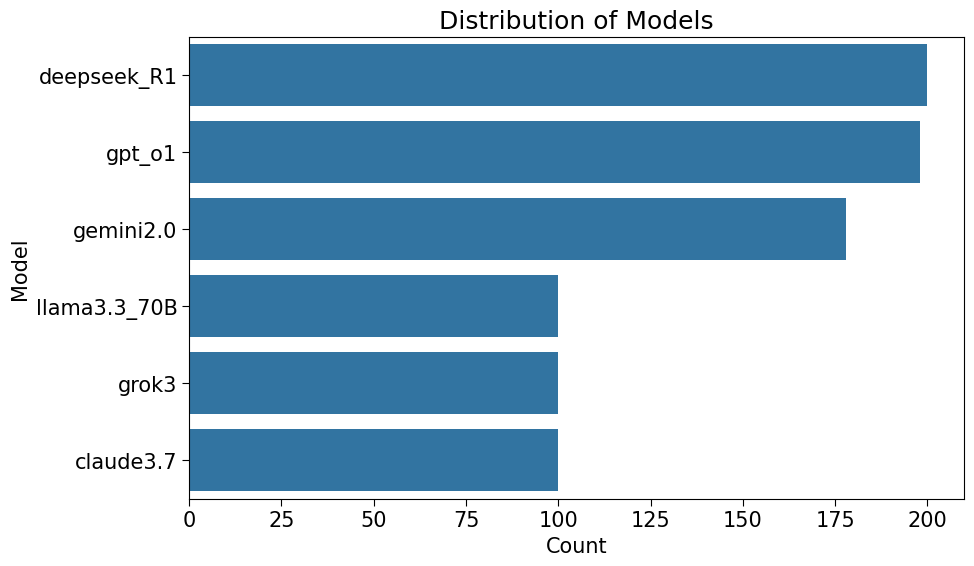

In [58]:
# Distribution of LLM models
df_filtered = df[df['model'] != 'human']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, y='model', order=df_filtered['model'].value_counts().index)
plt.title("Distribution of Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()

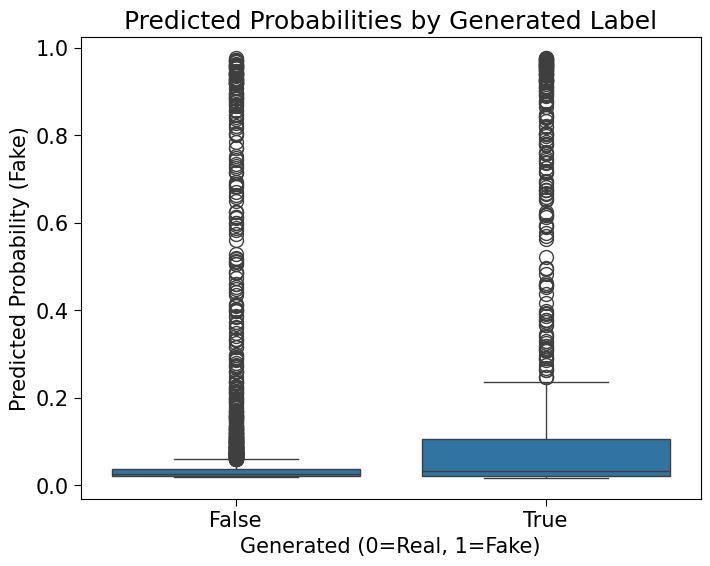

In [59]:
# Boxplot of `pred` scores by `generated`
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generated', y='pred')
plt.title("Predicted Probabilities by Generated Label")
plt.xlabel("Generated (0=Real, 1=Fake)")
plt.ylabel("Predicted Probability (Fake)")
plt.show()

       title_length  abstract_length  tldr_length
count   3485.000000      3485.000000  3485.000000
mean      69.307030      1150.334577   131.921951
std       19.390405       412.865102    52.823017
min       18.000000       155.000000     1.000000
25%       57.000000       946.000000    93.000000
50%       69.000000      1199.000000   128.000000
75%       81.000000      1425.000000   165.000000
max      168.000000      2616.000000   250.000000


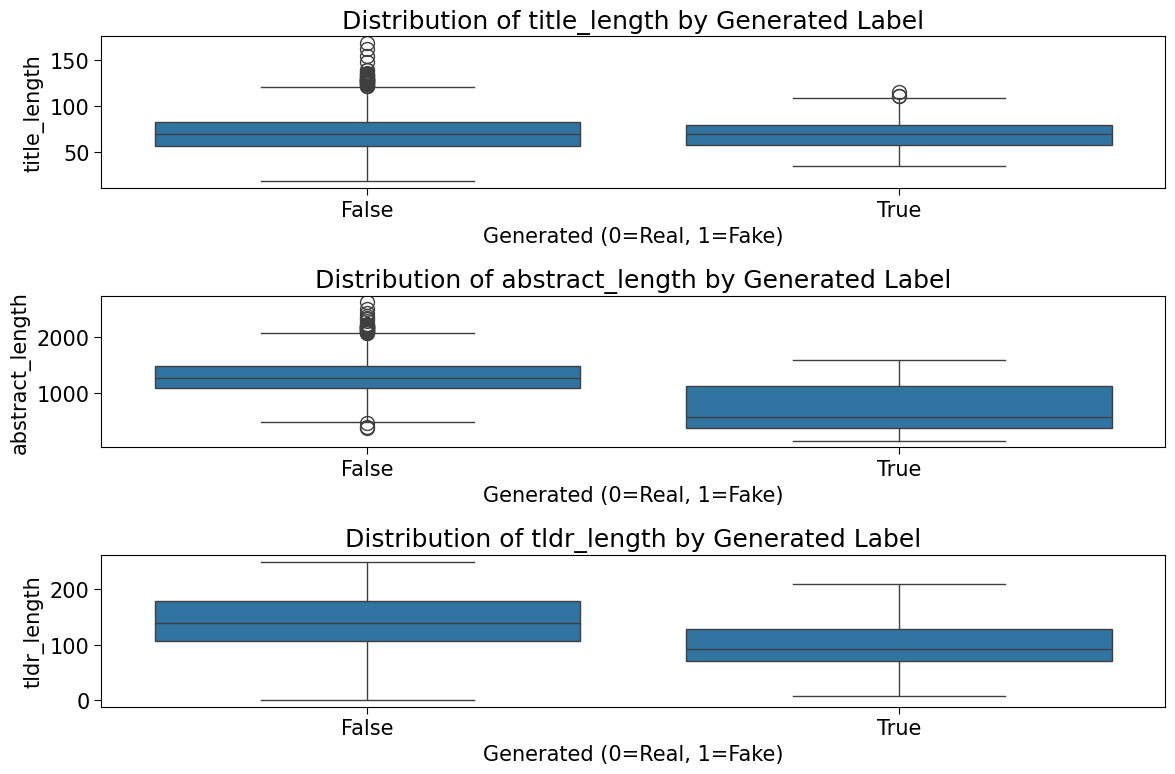

In [60]:
# Add text length columns
df['title_length'] = df['title'].apply(len)
df['abstract_length'] = df['abstract'].apply(len)
df['tldr_length'] = df['TLDR'].apply(len)

# Summary statistics for text lengths
print(df[['title_length', 'abstract_length', 'tldr_length']].describe())

# Boxplots of text lengths by `generated`
plt.figure(figsize=(12, 8))
for i, col in enumerate(['title_length', 'abstract_length', 'tldr_length'], 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=df, x='generated', y=col)
    plt.title(f"Distribution of {col} by Generated Label")
    plt.xlabel("Generated (0=Real, 1=Fake)")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Word Cloud**

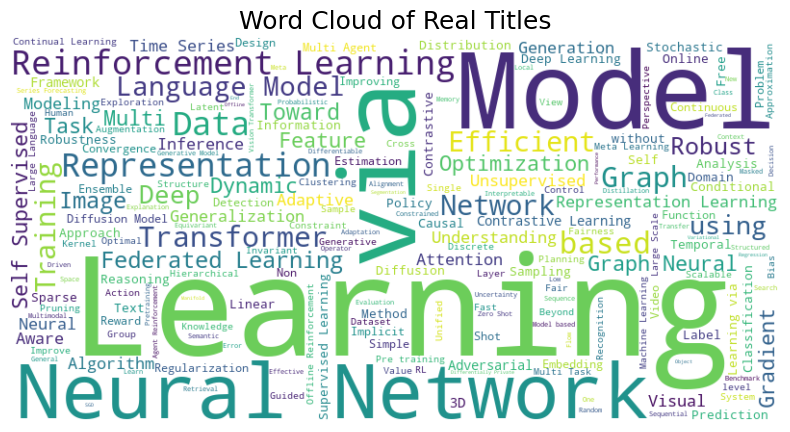

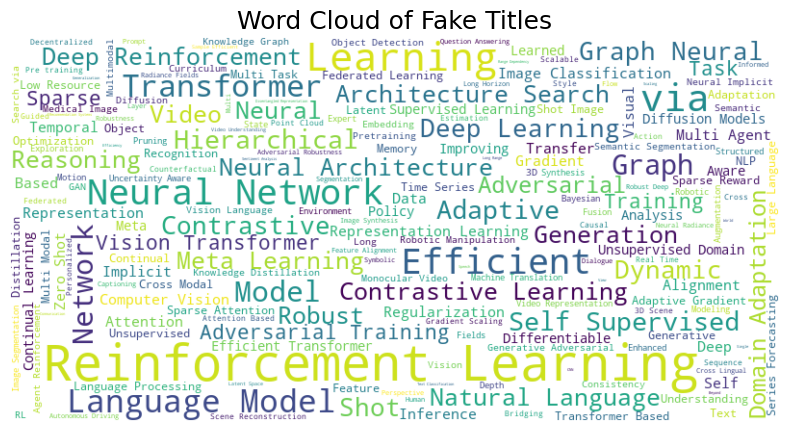

In [61]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all titles, abstracts, and TLDRs
real_titles = " ".join(df[df['generated'] == False]['title'])
fake_titles = " ".join(df[df['generated'] == True]['title'])

# Generate word clouds
generate_wordcloud(real_titles, "Word Cloud of Real Titles")
generate_wordcloud(fake_titles, "Word Cloud of Fake Titles")

**Sentiment Analysis**

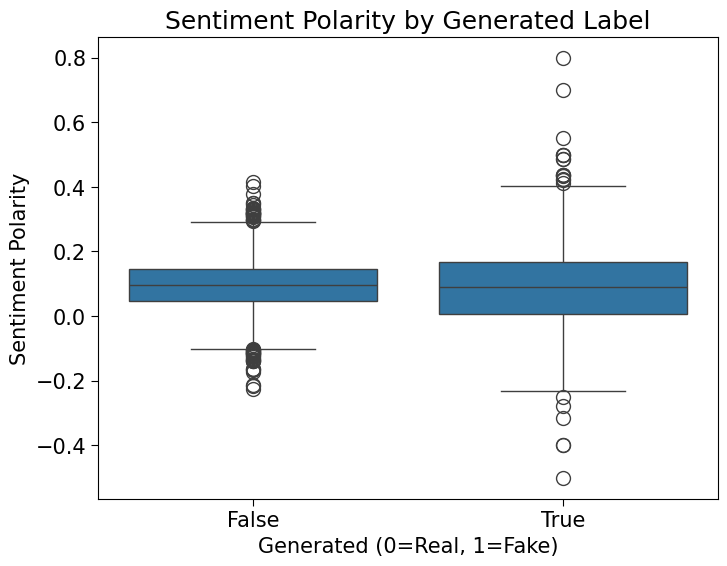

In [62]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Add sentiment column
df['sentiment'] = df['abstract'].apply(get_sentiment)

# Boxplot of sentiment by `generated`
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generated', y='sentiment')
plt.title("Sentiment Polarity by Generated Label")
plt.xlabel("Generated (0=Real, 1=Fake)")
plt.ylabel("Sentiment Polarity")
plt.show()

**Latent Dirchlet Allocation**

In [91]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Combine text for topic modeling
df['combined_text'] = df['title'] + ' ' + df['abstract'] + ' ' + df['TLDR']
vectorizer_lda = CountVectorizer(stop_words='english', max_features=5000)
X_lda = vectorizer_lda.fit_transform(df['combined_text'])


[]

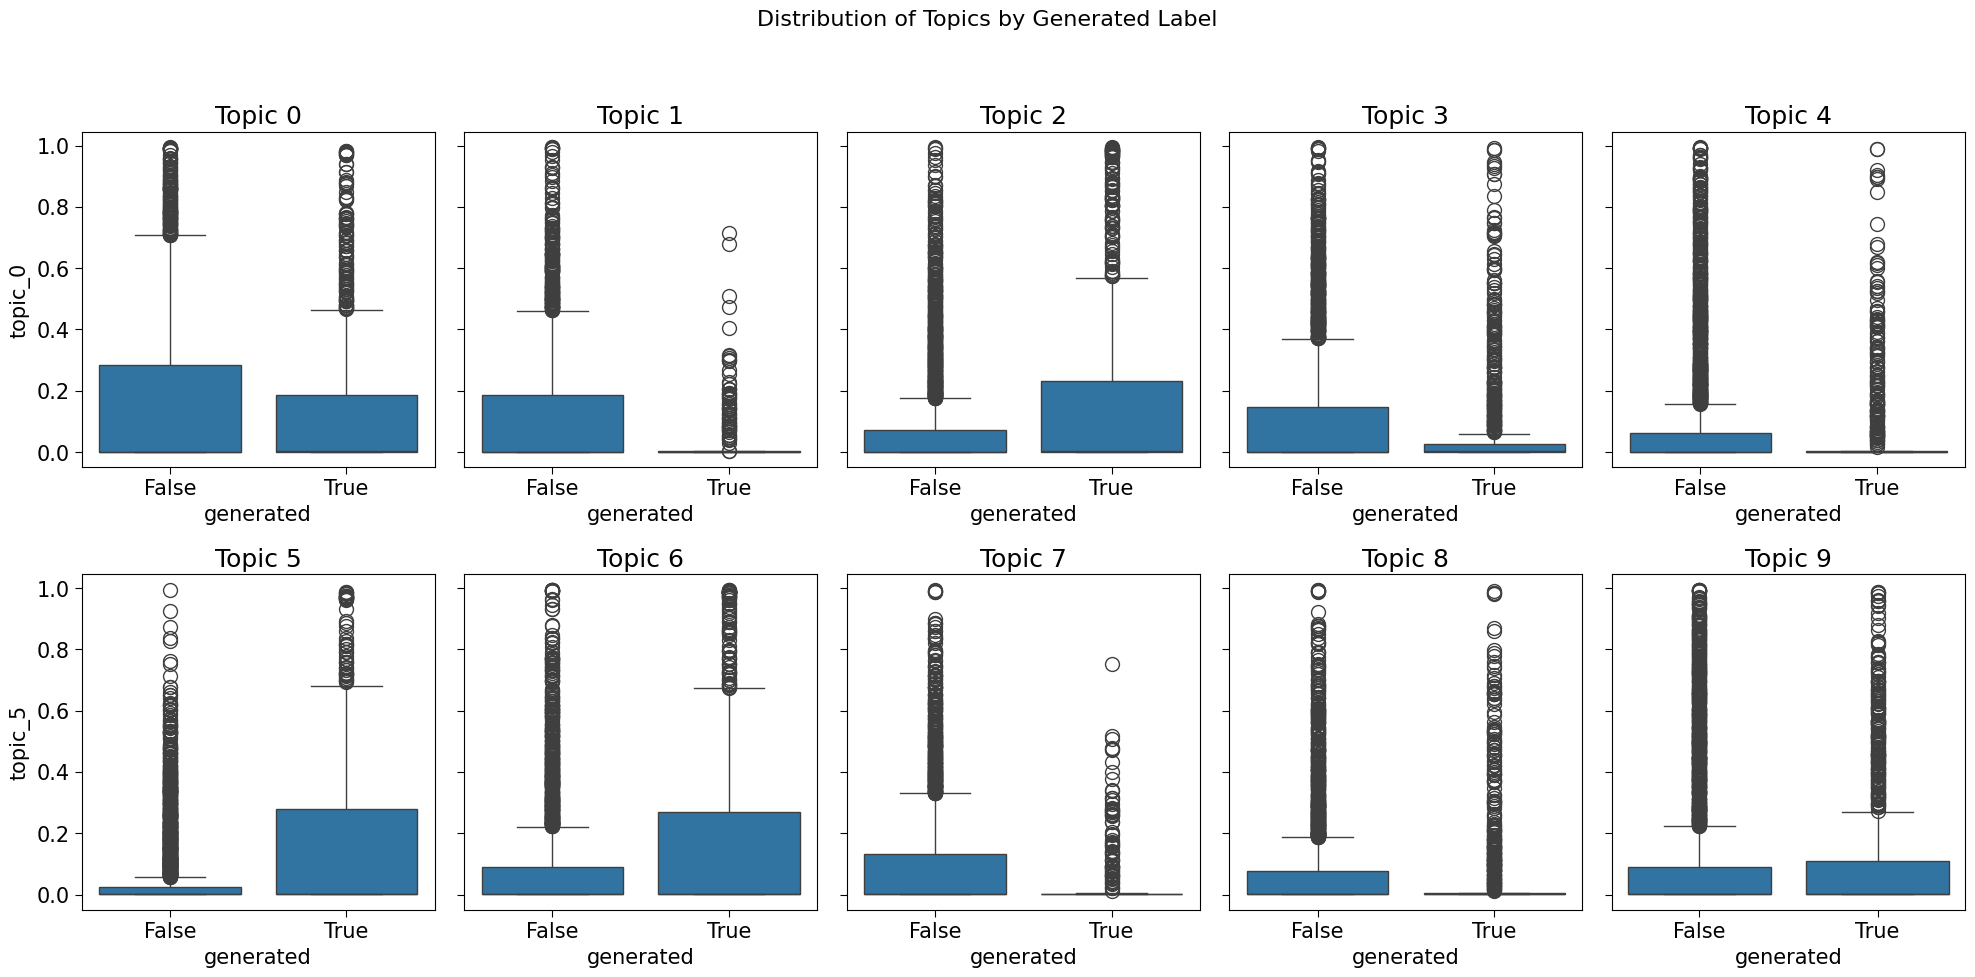

In [94]:
# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda.fit_transform(X_lda)

# Add topic probabilities to dataframe
topic_cols = [f'topic_{i}' for i in range(10)]
df[topic_cols] = pd.DataFrame(lda_features, index=df.index)

# Create a 2x5 grid of box plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=True)
fig.suptitle('Distribution of Topics by Generated Label', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='generated', y=f'topic_{i}', data=df, ax=ax)
    ax.set_title(f'Topic {i}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.plot()

In [93]:
# Print top words per topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {', '.join(top_features)}")
print_top_words(lda, vectorizer_lda.get_feature_names_out(), 10)

Topic 0: models, model, data, language, training, adversarial, performance, propose, robustness, domain
Topic 1: neural, networks, learning, model, data, models, network, fairness, work, different
Topic 2: attention, transformer, transformers, tasks, time, performance, neural, model, memory, models
Topic 3: models, model, neural, search, method, methods, generative, propose, generation, diffusion
Topic 4: learning, data, training, federated, model, graph, propose, local, method, clients
Topic 5: graph, learning, tasks, approach, graphs, method, propose, methods, fewshot, hierarchical
Topic 6: learning, contrastive, representations, representation, image, 3d, selfsupervised, object, visual, video
Topic 7: learning, data, algorithm, algorithms, uncertainty, optimal, function, diffusion, problem, propose
Topic 8: training, gradient, learning, networks, deep, neural, loss, convergence, generalization, regularization
Topic 9: learning, reinforcement, policy, rl, tasks, agents, reward, offli

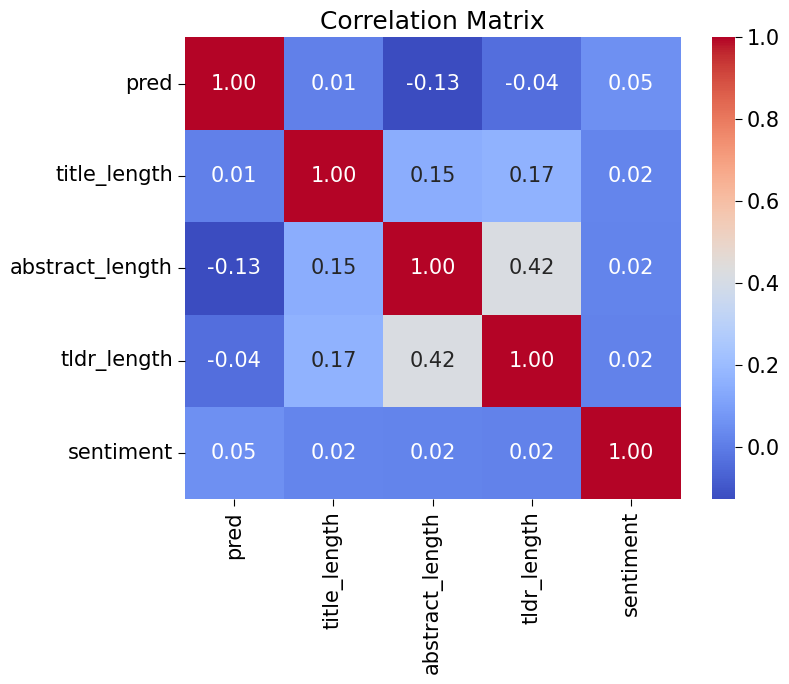

In [64]:
# Compute correlation matrix
correlation_matrix = df[['pred', 'title_length', 'abstract_length', 'tldr_length', 'sentiment']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [65]:
# Hypothesis 1: Title Length (Human vs. LLM)
human_titles = df[df['generated'] == False]['title_length']
llm_titles = df[df['generated'] == True]['title_length']
t_stat_title, p_value_title = ttest_ind(human_titles, llm_titles, equal_var=False)
print("Hypothesis 1: Title Length (Human vs. LLM)")
print(f"T-statistic: {t_stat_title:.4f}, P-value: {p_value_title:.4f}")
if p_value_title < 0.05:
    print("Significant difference in title length between human and LLM papers.")
else:
    print("No significant difference in title length.")


Hypothesis 1: Title Length (Human vs. LLM)
T-statistic: 2.2763, P-value: 0.0229
Significant difference in title length between human and LLM papers.


In [66]:
# Hypothesis 2: Abstract Sentiment (Human vs. LLM)
human_abs_sent = df[df['generated'] == False]['sentiment']
llm_abs_sent = df[df['generated'] == True]['sentiment']
t_stat_sent, p_value_sent = ttest_ind(human_abs_sent, llm_abs_sent, equal_var=False)
print("\nHypothesis 2: Abstract Sentiment (Human vs. LLM)")
print(f"T-statistic: {t_stat_sent:.4f}, P-value: {p_value_sent:.4f}")
if p_value_sent < 0.05:
    print("Significant difference in abstract sentiment between human and LLM papers.")
else:
    print("No significant difference in abstract sentiment.")


Hypothesis 2: Abstract Sentiment (Human vs. LLM)
T-statistic: -0.4557, P-value: 0.6487
No significant difference in abstract sentiment.



LLM-Specific Analysis:
         model_  pred_mean  pred_std  title_length_mean  title_length_std   
0     claude3.7   0.175022  0.259170          76.540000         14.324113  \
1   deepseek_R1   0.019351  0.001542          68.530000         12.581357   
2     gemini2.0   0.291990  0.363479          77.938202         11.807381   
3        gpt_o1   0.211535  0.306796          70.787879         10.112838   
4         grok3   0.029755  0.056266          59.590000         12.800012   
5  llama3.3_70B   0.298772  0.338433          45.280000          7.692421   

   abstract_length_mean  abstract_length_std  tldr_length_mean   
0           1090.780000            75.812579        157.710000  \
1            385.440000           100.185739         75.590000   
2            590.146067            96.919275        107.005618   
3           1361.146465           120.087759        127.388889   
4            507.750000           231.320163         74.380000   
5            307.500000           103.99

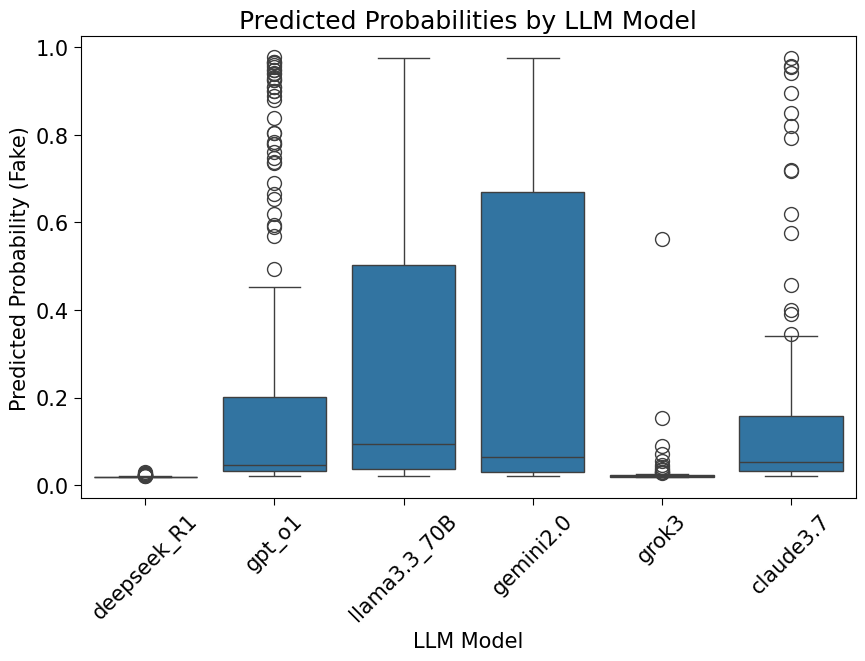

In [67]:
# --- Specific LLM Analysis ---
# Filter out human papers and group by LLM models
llm_df = df[df['model'] != 'human']
llm_grouped = llm_df.groupby('model').agg({
    'pred': ['mean', 'std'],
    'title_length': ['mean', 'std'],
    'abstract_length': ['mean', 'std'],
    'tldr_length': ['mean', 'std']
}).reset_index()

# Flatten column names
llm_grouped.columns = ['_'.join(col).strip() for col in llm_grouped.columns.values]
print("\nLLM-Specific Analysis:")
print(llm_grouped)

# Visualize pred scores by specific LLM
plt.figure(figsize=(10, 6))
sns.boxplot(data=llm_df, x='model', y='pred')
plt.title("Predicted Probabilities by LLM Model")
plt.xlabel("LLM Model")
plt.ylabel("Predicted Probability (Fake)")
plt.xticks(rotation=45)
plt.show()

**Analysis of Variance**

In [68]:
from scipy.stats import f_oneway
llm_df = df[df['model'] != 'human']
anova_result = f_oneway(*[llm_df[llm_df['model'] == m]['pred'] for m in llm_df['model'].unique()])
print(f"ANOVA for pred across LLMs: F-statistic={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4f}")

ANOVA for pred across LLMs: F-statistic=32.2298, p-value=0.0000


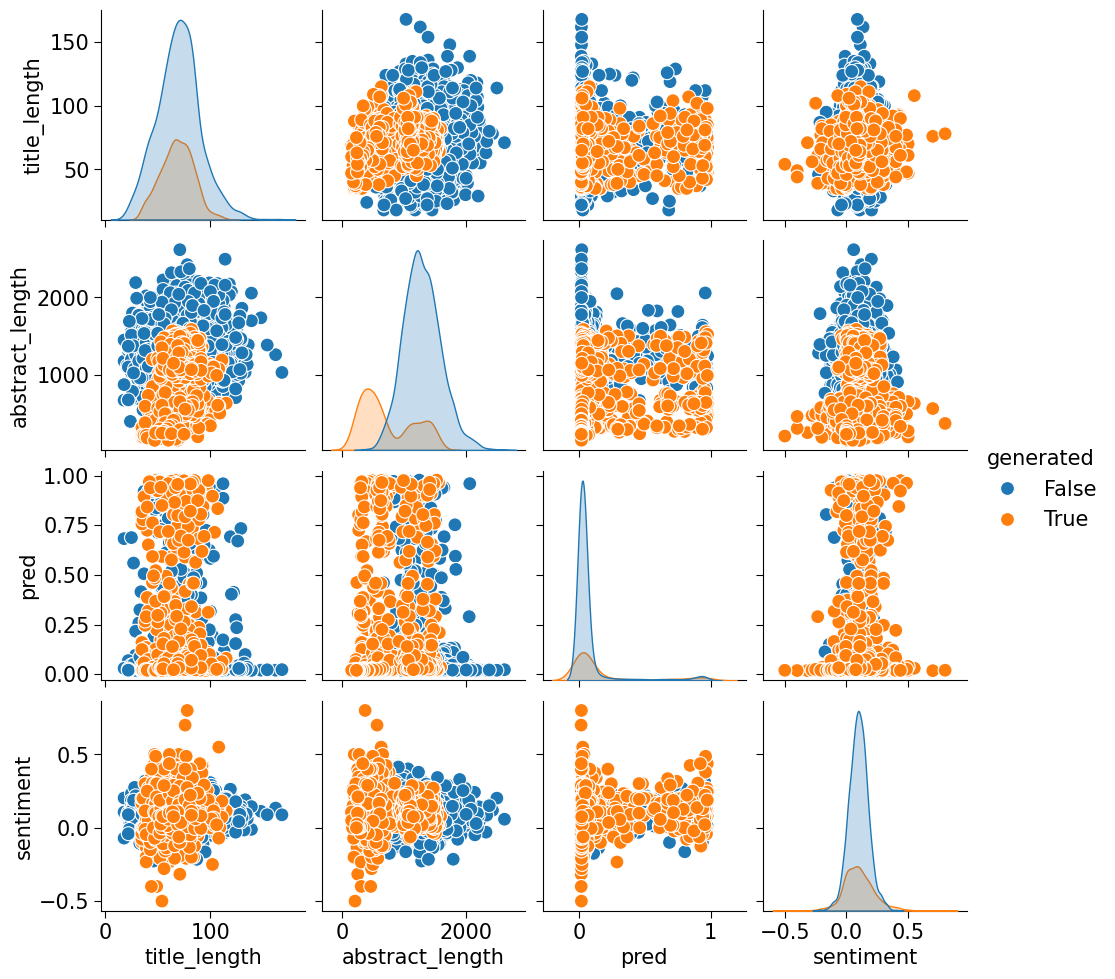

In [ ]:
#Pair Plot
sns.pairplot(df, hue='generated', vars=['title_length', 'abstract_length', 'pred', 'sentiment'])
plt.show()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Feature Engineering</h1>  
     
</div>

In [70]:
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply the text cleaning function to 'title', 'abstract', and 'TLDR'
df['title'] = df['title'].apply(clean_text)
df['abstract'] = df['abstract'].apply(clean_text)
df['TLDR'] = df['TLDR'].apply(clean_text)


In [71]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is already defined
# Fill NaN values with empty strings
df['title'] = df['title'].fillna('')
df['abstract'] = df['abstract'].fillna('')
df['TLDR'] = df['TLDR'].fillna('')

# Tokenize text (title + abstract + TLDR)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # Limiting to 5000 features

# Fit and transform the text data into a bag-of-words model
X = vectorizer.fit_transform(df['title'] + ' ' + df['abstract'] + ' ' + df['TLDR'])

vectorizer_bow = CountVectorizer(stop_words='english', max_features=5000)
X_bow = vectorizer_bow.fit_transform(df['title'] + ' ' + df['abstract'] + ' ' + df['TLDR'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(df['title'] + ' ' + df['abstract'] + ' ' + df['TLDR'])

# Convert to a DataFrame for easier inspection
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df.head()

,01,05,10,100,100k,10x,11,12,120,13,...,wrt,wsol,xai,years,yield,yielding,yields,zero,zeroshot,zerosum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
# Target
y = df['generated']

In [73]:
# Split data for both feature sets
X_train_bow, X_temp_bow, y_train, y_temp = train_test_split(X_bow, y, test_size=0.4, random_state=42)
X_val_bow, X_test_bow, y_val, y_test = train_test_split(X_temp_bow, y_temp, test_size=0.5, random_state=42)

X_train_tfidf, X_temp_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)
X_val_tfidf, X_test_tfidf, _, _ = train_test_split(X_temp_tfidf, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
# --- Hyperparameter Tuning ---
# Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
grid_search_bow = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_bow.fit(X_train_bow, y_train)
# Performing grid search for TF-IDF
grid_search_tfidf = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_tfidf.fit(X_train_tfidf, y_train)

# Best models
best_rf_bow = grid_search_bow.best_estimator_
best_rf_tfidf = grid_search_tfidf.best_estimator_

# Evaluate on validation set
y_pred_bow = best_rf_bow.predict(X_val_bow)
y_pred_tfidf = best_rf_tfidf.predict(X_val_tfidf)

print("BoW - Best Params:", grid_search_bow.best_params_)
print("BoW - Validation Accuracy:", accuracy_score(y_val, y_pred_bow))
print("BoW - Validation F1:", f1_score(y_val, y_pred_bow))
print("\nTF-IDF - Best Params:", grid_search_tfidf.best_params_)
print("TF-IDF - Validation Accuracy:", accuracy_score(y_val, y_pred_tfidf))
print("TF-IDF - Validation F1:", f1_score(y_val, y_pred_tfidf))

BoW - Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
BoW - Validation Accuracy: 0.9497847919655668
BoW - Validation F1: 0.8852459016393442

TF-IDF - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
TF-IDF - Validation Accuracy: 0.9426111908177905
TF-IDF - Validation F1: 0.8684210526315789


In [75]:
# --- Final Evaluation on Test Set ---
y_test_pred_bow = best_rf_bow.predict(X_test_bow)
print("\nFinal Test Set (BoW) Classification Report:")
print(classification_report(y_test, y_test_pred_bow))


Final Test Set (BoW) Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       519
        True       1.00      0.74      0.85       178

    accuracy                           0.93       697
   macro avg       0.96      0.87      0.90       697
weighted avg       0.94      0.93      0.93       697



In [76]:
# --- Interpretability ---
# Feature Importance (BoW with Random Forest)
feature_names_bow = vectorizer_bow.get_feature_names_out()
importances = best_rf_bow.feature_importances_
top_indices = importances.argsort()[-10:][::-1]  # Top 10 features
print("\nTop 10 Important Features (BoW):")
for idx in top_indices:
    print(f"{feature_names_bow[idx]}: {importances[idx]:.4f}")


Top 10 Important Features (BoW):
propose: 0.0216
approach: 0.0198
work: 0.0165
paper: 0.0121
ablation: 0.0118
different: 0.0109
problem: 0.0107
data: 0.0106
number: 0.0105
use: 0.0099


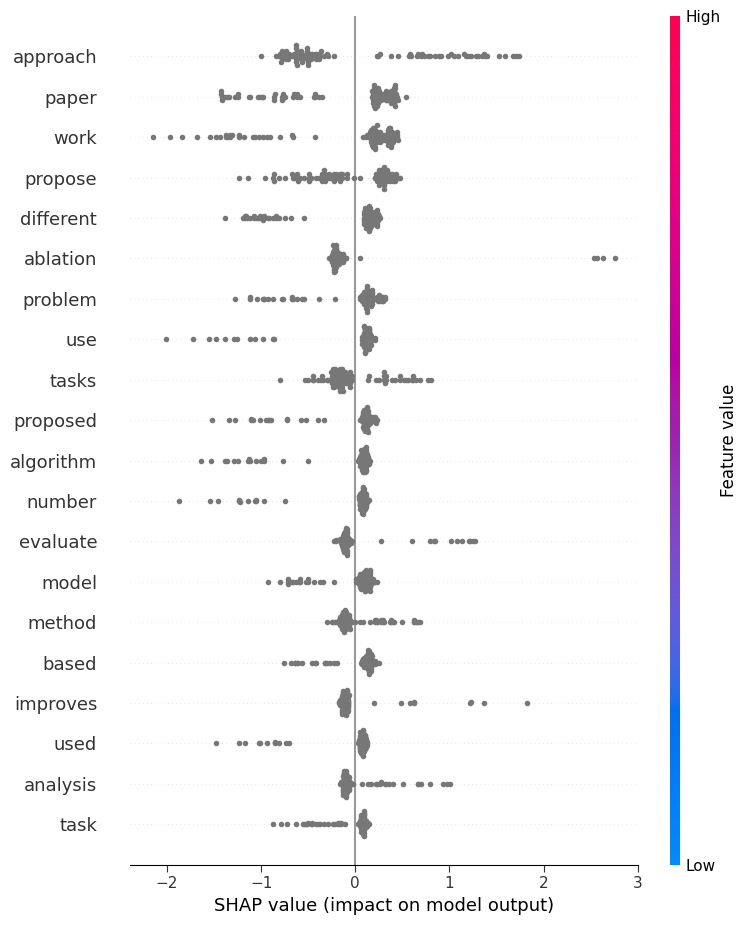

In [ ]:
import shap
from xgboost import XGBClassifier
# SHAP for XGBoost (using TF-IDF)
# Shows how much each feature contributes to the prediction for each instance
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_tfidf[:100])  # Limit for speed
shap.summary_plot(shap_values, X_test_tfidf[:100], feature_names=vectorizer_tfidf.get_feature_names_out())

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Machine Learning</h1>  
     
</div>

In [78]:
from sklearn.preprocessing import StandardScaler

# Create new features based on text length
df['title_length'] = df['title'].apply(len)
df['abstract_length'] = df['abstract'].apply(len)
df['TLDR_length'] = df['TLDR'].apply(len)

# Create a sentiment score (basic approach: positive/negative words)
from textblob import TextBlob

def sentiment_score(text):
    return TextBlob(text).sentiment.polarity

df['title_sentiment'] = df['title'].apply(sentiment_score)
df['abstract_sentiment'] = df['abstract'].apply(sentiment_score)
df['TLDR_sentiment'] = df['TLDR'].apply(sentiment_score)

# Standardize the numeric features (e.g., sentiment scores and lengths)
scaler = StandardScaler()
df[['title_length', 'abstract_length', 'TLDR_length', 'title_sentiment', 'abstract_sentiment', 'TLDR_sentiment']] = scaler.fit_transform(
    df[['title_length', 'abstract_length', 'TLDR_length', 'title_sentiment', 'abstract_sentiment', 'TLDR_sentiment']]
)


In [79]:
# Compare human vs LLM papers based on different features
human_papers = df[df['generated'] == False]
llm_papers = df[df['generated'] == True]

print("Average Title Length - Human:", human_papers['title_length'].mean())
print("Average Title Length - LLM:", llm_papers['title_length'].mean())

# Compare average sentiment
print("Average Title Sentiment - Human:", human_papers['title_sentiment'].mean())
print("Average Title Sentiment - LLM:", llm_papers['title_sentiment'].mean())


Average Title Length - Human: 0.003979103762888744
Average Title Length - LLM: -0.011851006526685446
Average Title Sentiment - Human: 0.02050934677375427
Average Title Sentiment - LLM: -0.06108320289123835


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Binary Classification</h1>  
     Predicting generated (real vs. fake)
</div>

In [80]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_df, df['generated'], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [81]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Store the results
results = {}

# Training loop
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": f1,
        "confusion_matrix": cm,
        "classification_report": classification_report(y_val, y_pred)
    }

In [82]:
# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9699
F1 Score: 0.9381
Confusion Matrix:
[[517  11]
 [ 10 159]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       528
        True       0.94      0.94      0.94       169

    accuracy                           0.97       697
   macro avg       0.96      0.96      0.96       697
weighted avg       0.97      0.97      0.97       697

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9598
F1 Score: 0.9108
Confusion Matrix:
[[526   2]
 [ 26 143]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       528
        True       0.99      0.85      0.91       169

    accuracy                           0.96       697
   macro avg       0.97      0.92      0.94       697
weighted avg       0.96      0.96      0.96       697

--------------------------------------------------


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Multi Classification</h1>  
     Predicting the model column
</div>

<hr style="border:2px solid black"> </hr>

In [83]:
# Convert 'model' column to categorical if it's not already
df['model'] = df['model'].astype('category')

# Extract features and target variable
X = X_df  # Assuming X_df contains the preprocessed features
y = df['model']  # Multi-class target variable

# Train-test split (60% training, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [84]:
from lightgbm import LGBMClassifier
# Define models for multi-class classification
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', solver='liblinear'),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(decision_function_shape='ovr'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier()
}

# Store results
results = {}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')  # Weighted F1 for multi-class
    cm = confusion_matrix(y_val, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": f1,
        "confusion_matrix": cm,
        "classification_report": classification_report(y_val, y_pred)
    }

c:\Users\balaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\balaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\balaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7146
[LightGBM] [Info] Number of data points in the train set: 2091, number of used features: 1631
[LightGBM] [Info] Start training from score -3.486515
[LightGBM] [Info] Start training from score -2.825116
[LightGBM] [Info] Start training from score -2.991437
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -3.567860
[LightGBM] [Info] Start training from score -0.291675
[LightGBM] [Info] Start training from score -3.656414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [85]:
# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Weighted F1 Score: {result['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.9498
Weighted F1 Score: 0.9457
Confusion Matrix:
[[ 15   0   0   0   0   2   0]
 [  0  35   0   0   0   4   0]
 [  0   0  29   1   0   4   0]
 [  0   0   1  26   0   7   0]
 [  1   6   0   1  10   4   1]
 [  1   0   1   1   0 525   0]
 [  0   0   0   0   0   0  22]]
Classification Report:
              precision    recall  f1-score   support

   claude3.7       0.88      0.88      0.88        17
 deepseek_R1       0.85      0.90      0.88        39
   gemini2.0       0.94      0.85      0.89        34
      gpt_o1       0.90      0.76      0.83        34
       grok3       1.00      0.43      0.61        23
       human       0.96      0.99      0.98       528
llama3.3_70B       0.96      1.00      0.98        22

    accuracy                           0.95       697
   macro avg       0.93      0.83      0.86       697
weighted avg       0.95      0.95      0.95       697

--------------------------------------------------
Model: Random Forest
Ac

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Regression</h1>  

Predicting the pred column (probability score).
     
</div>

In [87]:
# Fill missing values
df['title'] = df['title'].fillna('')
df['abstract'] = df['abstract'].fillna('')
df['TLDR'] = df['TLDR'].fillna('')

# Combine text columns
df['text'] = df['title'] + ' ' + df['abstract'] + ' ' + df['TLDR']

# Vectorize text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['text'])

# Assuming 'target' is the column to predict
y = df['pred']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R² Score": r2
    }

# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {result['MSE']:.4f}")
    print(f"RMSE: {result['RMSE']:.4f}")
    print(f"MAE: {result['MAE']:.4f}")
    print(f"R² Score: {result['R² Score']:.4f}")
    print("-" * 50)

Model: Linear Regression
MSE: 0.0621
RMSE: 0.2491
MAE: 0.1806
R² Score: -0.6149
--------------------------------------------------
Model: Ridge Regression
MSE: 0.0611
RMSE: 0.2472
MAE: 0.1788
R² Score: -0.5905
--------------------------------------------------
Model: Lasso Regression
MSE: 0.0385
RMSE: 0.1962
MAE: 0.1130
R² Score: -0.0013
--------------------------------------------------
Model: Random Forest Regressor
MSE: 0.0368
RMSE: 0.1917
MAE: 0.1040
R² Score: 0.0433
--------------------------------------------------
Model: XGBoost Regressor
MSE: 0.0380
RMSE: 0.1949
MAE: 0.1046
R² Score: 0.0113
--------------------------------------------------


In [88]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                              MSE      RMSE       MAE  R² Score
Linear Regression        0.062056  0.249111  0.180638 -0.614919
Ridge Regression         0.061116  0.247217  0.178818 -0.590453
Lasso Regression         0.038477  0.196156  0.112980 -0.001310
Random Forest Regressor  0.036763  0.191737  0.104000  0.043301
XGBoost Regressor        0.037993  0.194918  0.104566  0.011286
